In [1]:
X = ones(2);

In [3]:
X


X =

     1     1
     1     1



In [3]:
% % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % 
% 
% Main - Istruzioni
% 
% Per utilizzare questo script abbiamo bisogno di una matrice ordinata in
% questo modo:
% 
%   1 Colonna - Complexity;
%   2 Colonna - Form Factor (FF);
%   3 Colonna - Radio between average backscattering and its standard
%               deviation outside the area(RBSDO);
%   4 Colonna - GLCM2_TXT Stat Matrix Energy;
%   5 Colonna - TXT Stat Matrix Entropy.
% 
% Dopo aver creato questa matrice, utilizzare l'algoritmo di normalizzazione
% zscore per normalizzare i dati.
% A questo punto basta salvare la matrice degli input e avviare lo script.
% 
% In questo script utilizziamo come file di esempio la matrice 
% Main5FeatureNorm.mat
% Sostituendo questo file con quello a nostra disposizione, otterremo i
% risultati richiesti.
% 
% % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % 


% Caricamento matrice delle features + Tag
Features=cell2mat(struct2cell(load('Main5FeatureNorm.mat')));
% Caricamento fuzzy logic
f=readfis('FuzzyTest2.fis');

% Facoltativo: Esclusione dei Tag 
A=double(Features(:,1:5));

% Risultato della fuzzy
Result=evalfis(A,f);

> In evalfis (line 75)
Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

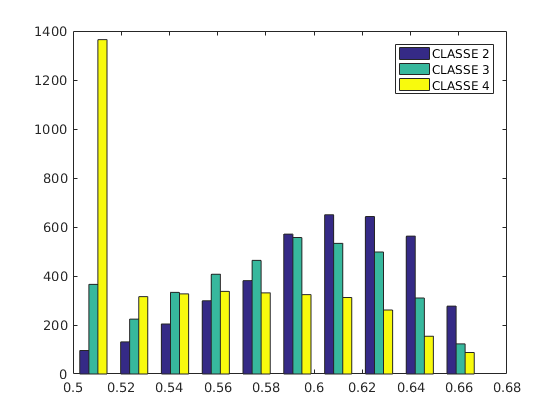

In [4]:
% Istogramma dei risultati
hist(Result);
legend('CLASSE 2','CLASSE 3', 'CLASSE 4');